# Car Price Predictor

## Goal of this code
Create a model to predict the car selling price, using Kaggles vehicle dataset
(https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho)

## Code

### Import Dataset and necessary libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/car_data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Data Analysis

In [5]:
df.shape

(301, 9)

In [14]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [29]:
# Checking Unique values of columns
print(df.Seller_Type.unique())
print(df.Transmission.unique())
print(df.Owner.unique())
print(df.Fuel_Type.unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [11]:
# Checking missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [12]:
# Checking values distribution and data balancing (not so important for this project)
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [15]:
# Creating a new dataset to work with and droping "Car Name" column
new_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [16]:
new_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Data Engineering

In [23]:
# Creating new feature from the existing ones.
# In this case, we'll creating a "car_age" feature, subtracting its year from the current year
current_year=2021

In [24]:
new_dataset['car_age'] = current_year-df['Year']

In [25]:
new_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [26]:
# So now we'll drop "Year" column, because we don't need it anymore.
# And we should drop it because, in truth, if we keep it it duplicates the data and distorts the feature correlation
# and this doesn't tells us more than the "car_age" we just created.

new_dataset.drop(['Year'], axis=1, inplace=True)

In [27]:
new_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [30]:
# Let's now encode the relevant features, like "Fuel_Type", "Seller_Type", "Transmission".
# The information in these features is important for us, but for a machine it is better if translated in numbers not strings.

new_dataset=pd.get_dummies(new_dataset, drop_first=True)

### Data Analysis again (now with new features)

In [31]:
new_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [32]:
# Check out the correlaction between features
new_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
car_age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


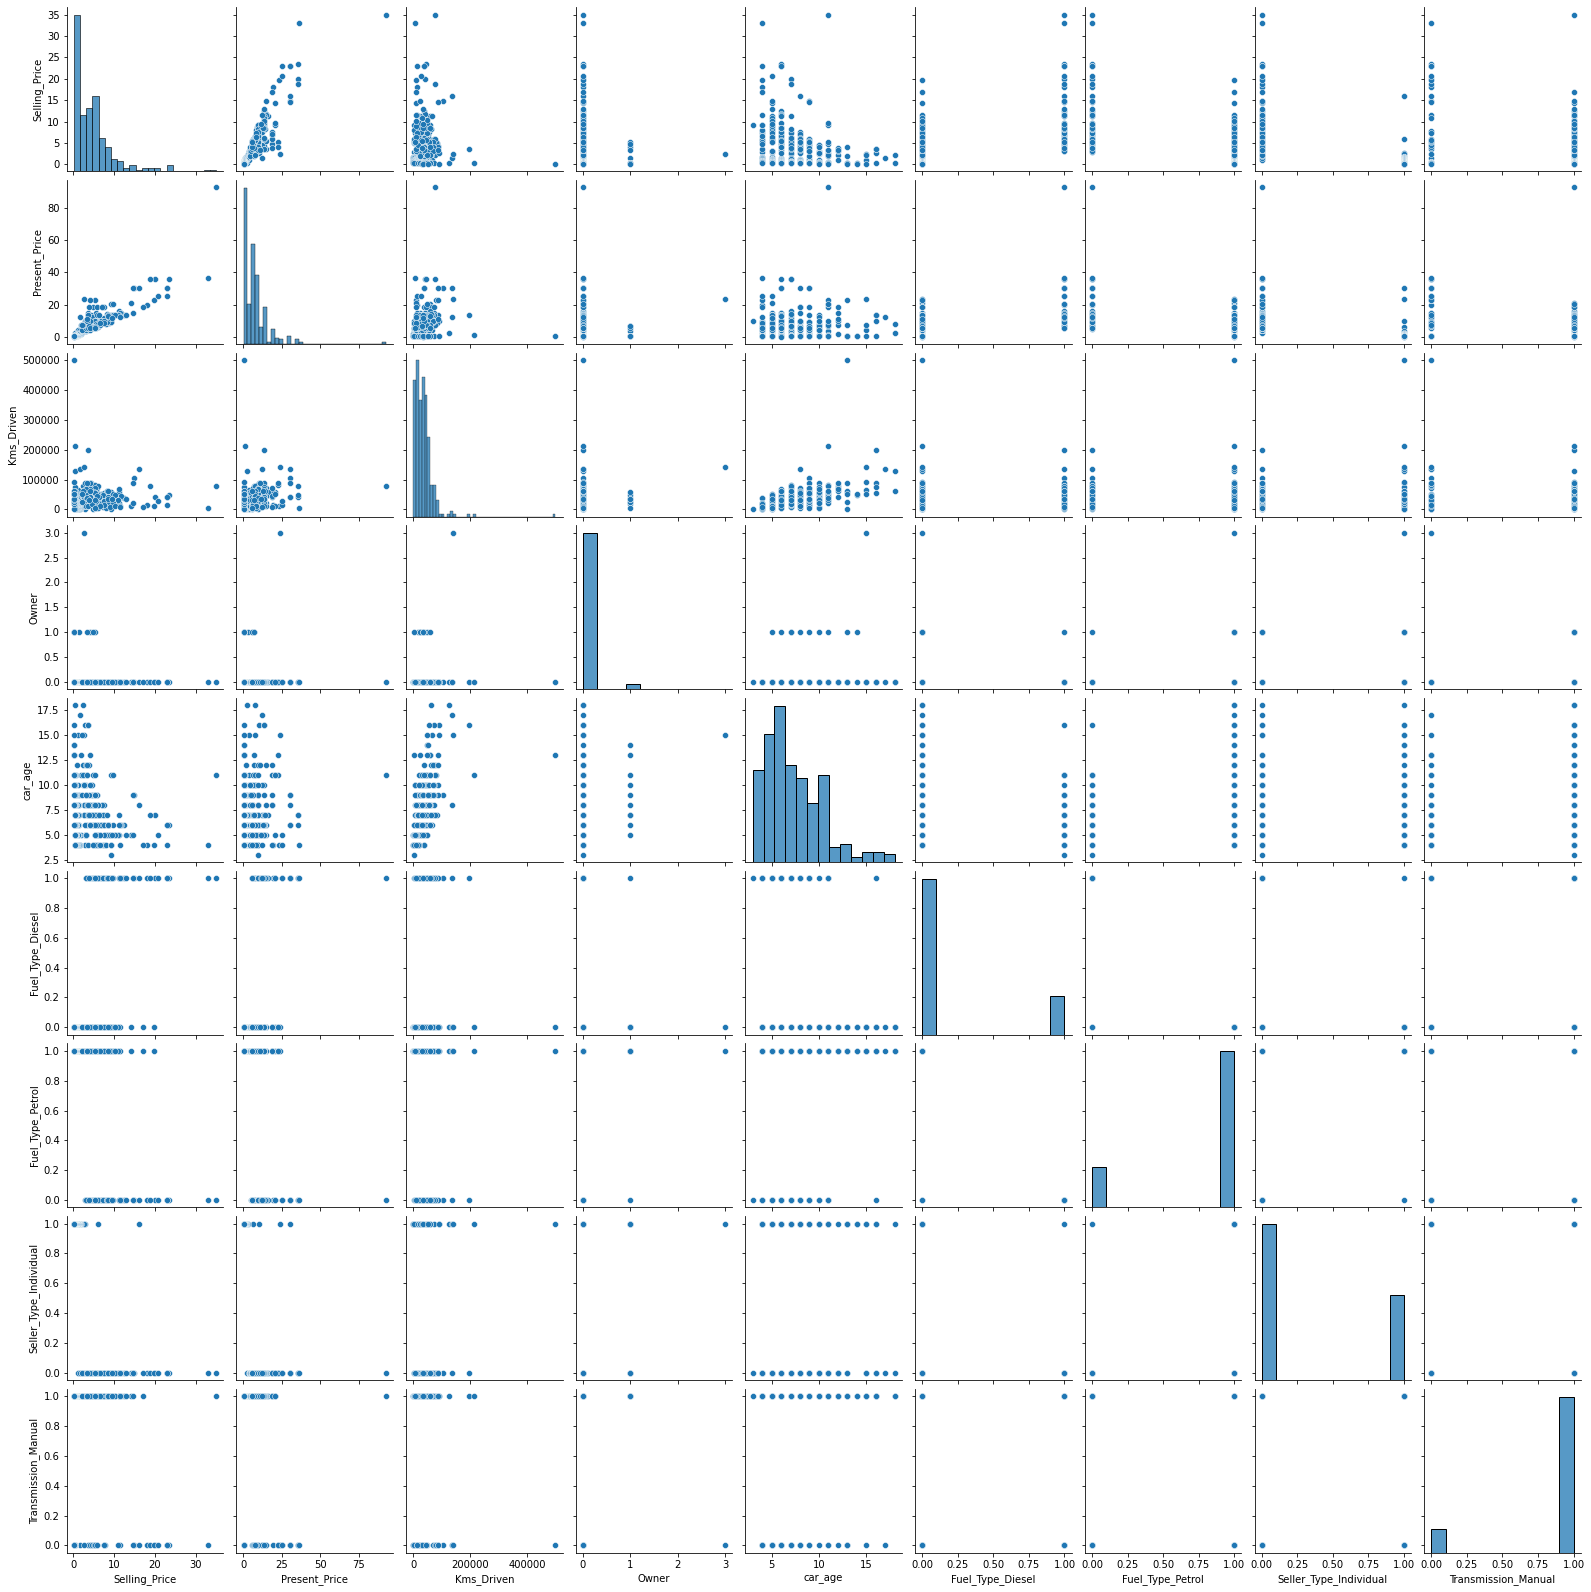

In [35]:
# Check out the correlation by graphs
sns.pairplot(new_dataset)

<AxesSubplot:>

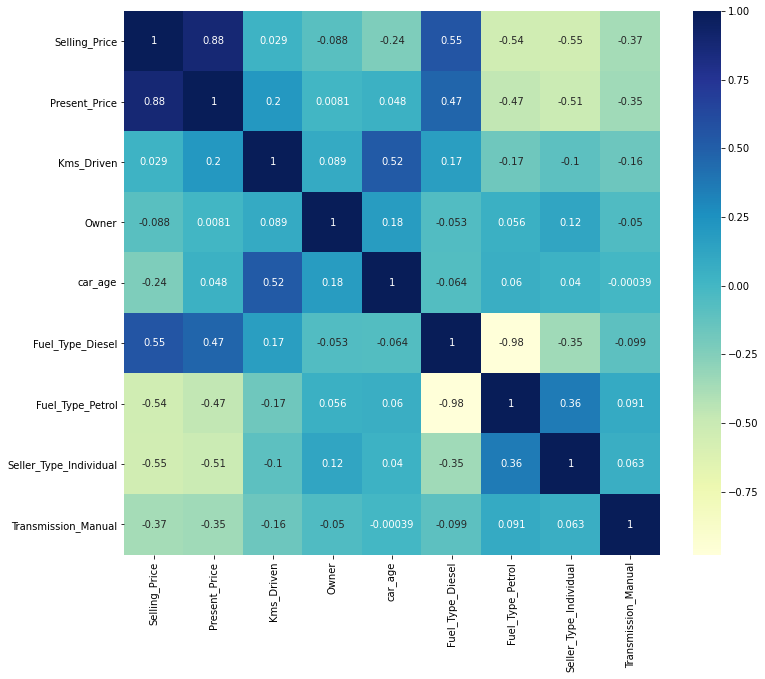

In [47]:
# Just prefer this one - plot the dataset.correlation in a heatmap
plt.figure(figsize=(12,10))
sns.heatmap(new_dataset.corr(), annot=True, cmap="YlGnBu")

### Model preparation

In [66]:
# Getting features variable X
X=new_dataset.drop(new_dataset.columns[0],axis=1)

In [68]:
X.head()

,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [73]:
# Getting our target variable Y
y=new_dataset[new_dataset.columns[0]]

In [74]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [75]:
# Checking feature importance with sklearn
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [76]:
print(model.feature_importances_)

[0.41744957 0.0407985  0.00055027 0.07900736 0.20516884 0.01317106
 0.1284427  0.1154117 ]


In [92]:
pd.DataFrame(model.feature_importances_, index=X.columns, columns=["Importance"])

,Importance
Present_Price,0.417450
Kms_Driven,0.040799
Owner,0.000550
car_age,0.079007
Fuel_Type_Diesel,0.205169
Fuel_Type_Petrol,0.013171
Seller_Type_Individual,0.128443
Transmission_Manual,0.115412


<AxesSubplot:>

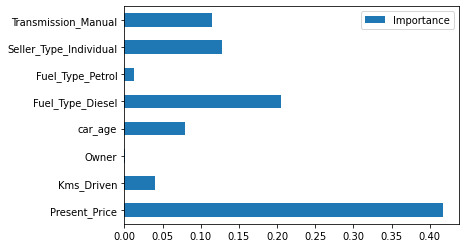

In [93]:
pd.DataFrame(model.feature_importances_, index=X.columns, columns=["Importance"]).plot(kind='barh')

<AxesSubplot:>

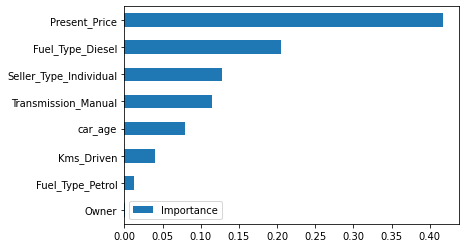

In [94]:
pd.DataFrame(model.feature_importances_, index=X.columns, columns=["Importance"]).sort_values(by='Importance').plot(kind='barh')

In [95]:
# Spliting data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [96]:
X_train.shape

(240, 8)

In [97]:
y_train.shape

(240,)

In [98]:
# Import and instanciate model

from sklearn.ensemble import RandomForestRegressor

reg=RandomForestRegressor()

In [102]:
# Randomized Search for Hyperparameters Tunning

from sklearn.model_selection import RandomizedSearchCV

# Defining the ranges of values for each parameter to be tested with
n_estimators = np.arange(100, 1300, 100)
max_features=['auto','sqrt']
max_depth=np.arange(5,30,5)
min_samples_split=[2,4,8,16,32,64,128]
min_samples_leaf=[1,2,4,8,10]

In [103]:
# Define the grid search for the parameters considered for the random search
random_grid={'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf}

In [104]:
print(random_grid)

{'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200]), 'max_features': ['auto', 'sqrt'], 'max_depth': array([ 5, 10, 15, 20, 25]), 'min_samples_split': [2, 4, 8, 16, 32, 64, 128], 'min_samples_leaf': [1, 2, 4, 8, 10]}


In [108]:
# Instanciate model and set self params.
model=RandomizedSearchCV(estimator= reg,
                               param_distributions= random_grid,
                               scoring= 'neg_mean_squared_error',
                               n_iter= 10, #10 is the same as the default
                               cv= 5, #5 is the same as the default None
                               verbose= 1,
                               random_state= 42,
                               n_jobs= -1)

In [109]:
# Training the model
model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.8s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': array([ 5, 10, 15, 20, 25]),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 8, 10],
                                        'min_samples_split': [2, 4, 8, 16, 32,
                                                              64, 128],
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200])},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

### Prediction

In [110]:
# Let's make a prediction with trained model

prediction = model.predict(X_test)

In [111]:
prediction

array([ 5.52208333,  3.87475   ,  0.58905   ,  2.91841667,  5.06966667,
        5.25741667,  2.1275    ,  0.54036667,  3.58116667,  0.75651667,
        1.22216667,  6.11833333,  1.16133333,  9.65968333,  1.22016667,
        8.00098333,  0.32325   ,  1.417     ,  5.38091667,  5.68838333,
       15.97593333,  3.08225   ,  5.1315    ,  8.41675   ,  1.14025   ,
        5.52208333,  0.76416667, 22.3571    ,  0.23461667,  3.9674    ,
        9.68796667,  4.91975   ,  0.84568333,  5.423     ,  7.81155   ,
        9.04055   ,  6.87691667,  0.38915   ,  9.1656    ,  0.31888333,
        2.74108333,  4.28575   ,  3.06141667,  8.17716667, 14.59728333,
        3.59708333,  6.11      ,  0.45383333,  4.24841667,  3.11505   ,
        4.40349444,  1.14608333,  1.022     ,  4.21826111,  1.05816667,
        3.25841667,  7.60466667,  2.25891667,  1.275     ,  1.642     ,
        6.73546667])

/Users/pedro/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

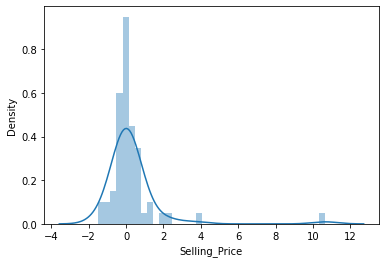

In [112]:
sns.distplot(y_test-prediction)

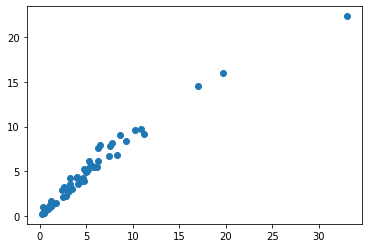

In [114]:
plt.scatter(y_test,prediction)